### Based on the result from P9, we calculate text similarities in this notebook.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
path="/content/drive/My Drive/Research/Data/"

os.chdir(path)
os.listdir(path)

Mounted at /content/drive/


['english.txt',
 '2019_2020_all_data_final.csv',
 '2014_abs',
 '2015_abs',
 '2016_abs',
 '2017_abs',
 '2018_abs',
 'My_Process',
 'all_data_statistic.csv',
 'top_category_details.csv',
 'top5_statistic_months.csv',
 'top5_statistics_col_1.csv',
 'cs_summary',
 'My_result']

In [ ]:
# 导入必要的包
import matplotlib.pyplot as plt
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import datapath
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
######### 函数  ##############################
# 读文件里面的数据转化为二维列表
def read_list(file_path):
    file1 = open(file_path, "r")
    list_row =file1.readlines()
    list_source = []
    for i in range(len(list_row)):
        column_list = list_row[i].strip().split("\t")  # 每一行split后是一个列表
        list_source.append(column_list)                # 在末尾追加到list_source
    for i in range(len(list_source)):  # 行数
        for j in range(len(list_source[i])):  # 列数
            list_source[i][j]=list_source[i][j]
    file1.close()
    return list_source


In [ ]:
# 加载模型
model_pda = datapath(path+'My_result/LDA_2/LDA_t30_p50_c50000')
lda = gensim.models.ldamodel.LdaModel.load(model_pda, mmap='r')

In [ ]:
# 加载词表
data_lemmatized = read_list(path+'My_Process/Lemmatize_data_14to20.txt')

# 转化词表格式
data = data_lemmatized

corpus_dictionary = Dictionary(data)
corpus = [corpus_dictionary.doc2bow(text) for text in data]

In [ ]:
print(data_lemmatized[0])

['learn', 'problem', 'function', 'process', 'network', 'optimization', 'training', 'method', 'base', 'combine', 'propose', 'paper', 'building', 'generalize', 'distance', 'measure', 'similarity', 'time', 'vary', 'function', 'sample', 'learn', 'problem', 'centre', 'function', 'connection', 'weight', 'convert', 'training', 'correspond', 'sequence', 'coefficient', 'network', 'training', 'function', 'construct', 'accord', 'error', 'criterion', 'optimization', 'solve', 'network', 'parameter', 'implement', 'solution', 'space', 'use', 'optimization', 'feature', 'experiment', 'result', 'illustrate', 'training', 'algorithm', 'improve', 'network', 'training', 'efficiency', 'stability']


In [ ]:
lda.get_document_topics(corpus[77],minimum_probability=1e-7)

[(0, 0.0020486037),
 (1, 0.0017131236),
 (2, 0.0018606937),
 (3, 0.0013640426),
 (4, 0.0014928865),
 (5, 0.0023470127),
 (6, 0.003892261),
 (7, 0.002621203),
 (8, 0.195697),
 (9, 0.002590738),
 (10, 0.0023404718),
 (11, 0.004304877),
 (12, 0.08809512),
 (13, 0.003247817),
 (14, 0.0017039904),
 (15, 0.0026088662),
 (16, 0.0023857458),
 (17, 0.0024724167),
 (18, 0.0029420452),
 (19, 0.0017337463),
 (20, 0.0015760121),
 (21, 0.0018701922),
 (22, 0.0021229067),
 (23, 0.0024678716),
 (24, 0.42703933),
 (25, 0.056151927),
 (26, 0.12129706),
 (27, 0.0016164891),
 (28, 0.0020040742),
 (29, 0.056391515)]

In [ ]:
lda.get_document_topics(corpus[4],minimum_probability=1e-5)


[(0, 0.000689795),
 (1, 0.0005768339),
 (2, 0.034024093),
 (3, 0.00045929322),
 (4, 0.077942275),
 (5, 0.072315186),
 (6, 0.0013106195),
 (7, 0.00088259863),
 (8, 0.12808661),
 (9, 0.00087234),
 (10, 0.00078807195),
 (11, 0.047954414),
 (12, 0.00090804836),
 (13, 0.0010936327),
 (14, 0.0005737587),
 (15, 0.0008784435),
 (16, 0.0008033159),
 (17, 0.00083250046),
 (18, 0.0009906464),
 (19, 0.0005837779),
 (20, 0.00053066644),
 (21, 0.00062972127),
 (22, 0.0007148139),
 (23, 0.0008309697),
 (24, 0.35953572),
 (25, 0.00047703352),
 (26, 0.00068675075),
 (27, 0.0005442957),
 (28, 0.26270846),
 (29, 0.0007753451)]

In [ ]:
# 构建相似矩阵
dimension = 30
similarity_matric = []

for doc_num in range(len(corpus)):
  vector = []
  doc = corpus[doc_num]
  probility = lda.get_document_topics(doc,minimum_probability=1e-7)
  for index in range(dimension):
    value = probility[index]
    value = list(value)
    vector.append(value[1])
  
  similarity_matric.append(vector)

print(len(similarity_matric))

165165


In [ ]:
#保存计算数据
similarity_matric = np.array(similarity_matric)
np.save(path+'My_result/LDA_2/similarity_by_ida.npy',similarity_matric)

In [ ]:
# 加载模型
similarity_matric = np.load(path+'My_result/LDA_2/similarity_by_ida.npy')
#similarity_matric =similarity_matric.tolist()


In [ ]:
np.linalg.norm(similarity_matric[0])

0.4790544

In [ ]:
#加载index_year  （包含data里的数据划分节点数）
index_year_ = np.load(path+'My_Process/index_year.npy')
index_year_=index_year_.tolist()
index_year_[12]

10802

In [ ]:
def similarity_processor(sim_matrix,process_number,begin_months,last_months,interaction):
 # 计算三个重要节点
 process_number = process_number
 begin_months = begin_months
 last_months = last_months
 interaction = interaction

 start_index =index_year_[len(index_year_)-process_number-last_months-begin_months-interaction]
 end_of_begin = index_year_[len(index_year_)-process_number-last_months-interaction]-1
 start_of_last = index_year_[len(index_year_)-process_number-last_months]
 end_index = index_year_[len(index_year_)-process_number]-1

 start_of_last = start_of_last - start_index
 end_of_begin = end_of_begin - start_index
 end_index = end_index - start_index-(start_of_last - end_of_begin) 
 start_index = 0

# 向量normalization,为下边求角度做准备
 array_result_norm = []
 for vector in sim_matrix:
   array_result_norm.append(vector/np.linalg.norm(vector))
 array_result_norm = np.array(array_result_norm)
 
 # 计算相似矩阵-->相似度
 begin_matrix = array_result_norm[start_index:start_of_last,:]
 last_matrix = array_result_norm[start_of_last:end_index+1,:]
 last_matrix = last_matrix.T
 print('we have needed normalizaed matrixes:',len(begin_matrix),' ',len(last_matrix[0]))

 similarity_matrix = np.dot(begin_matrix,last_matrix)
 print('complete similarity matrix')

 #计算相似度,通过矩阵运算直接计算,不在调用API
 line_number = len(similarity_matrix)
 column_number = len(similarity_matrix[0])
 vecor_1 = np.ones([1,line_number])
 vector_2 = np.ones([column_number,1])
 total_number = line_number*column_number

 similarity_value = np.dot(vecor_1,np.dot(similarity_matrix,vector_2))
 similarity_value = similarity_value[0,0] / total_number

 print('complete similarity value') 
 return similarity_value

In [ ]:
####### 计算相似度########
# 加载已有数据
#similarity_data = np.load(path+'My_result/LDA_2/similarity_by_ida_2.npy')
#similarity_data =similarity_data.tolist()
final_result = []


for number in range(1,73):
  #准备参数
  last_months = 1
  begin_months = 12
  interaction = 0
  process_number = number

  #调函数，计算相似的
  print('process ',number,' begin')
  similarity = similarity_processor(similarity_matric,process_number,begin_months,last_months,interaction)
  print('process number ',number,' simililarity:',similarity)
  final_result.append(similarity)
  print('similarity data is: ',final_result )
  print()
  print()

final_result = np.array(final_result)
np.save(path+'My_result/LDA_2/Final_Similarity_LDA_Summary.npy',final_result)

process  1  begin
we have needed normalizaed matrixes: 47833   141
complete similarity matrix
complete similarity value
process number  1  simililarity: 0.14768971471382658
similarity data is:  [0.14768971471382658]


process  2  begin
we have needed normalizaed matrixes: 45853   4832
complete similarity matrix
complete similarity value
process number  2  simililarity: 0.14718072514747868
similarity data is:  [0.14768971471382658, 0.14718072514747868]


process  3  begin
we have needed normalizaed matrixes: 42952   5864
complete similarity matrix
complete similarity value
process number  3  simililarity: 0.14729434509807252
similarity data is:  [0.14768971471382658, 0.14718072514747868, 0.14729434509807252]


process  4  begin
we have needed normalizaed matrixes: 42003   4080
complete similarity matrix
complete similarity value
process number  4  simililarity: 0.146841126461624
similarity data is:  [0.14768971471382658, 0.14718072514747868, 0.14729434509807252, 0.146841126461624]


pro

Text(0, 0.5, 'Similarity')

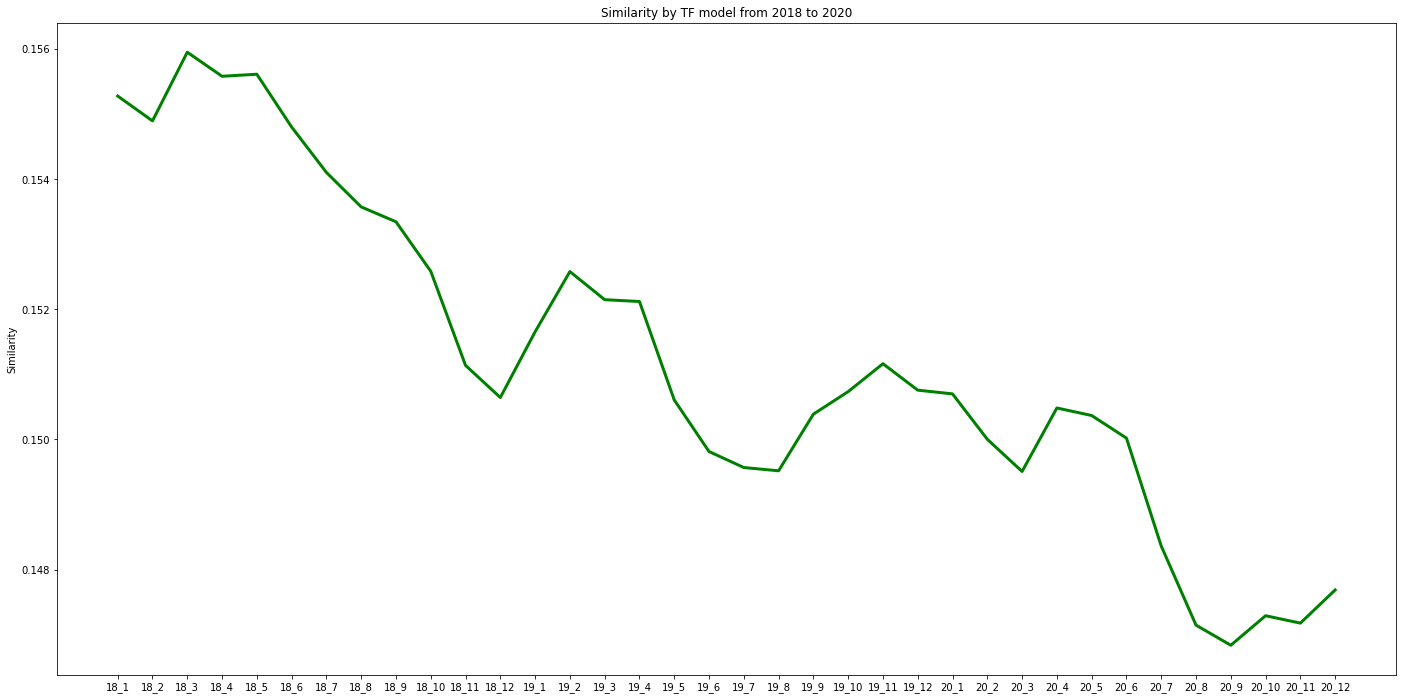

In [ ]:
# 制作x刻度  
years = ['18','19','20']
months=['1','2','3','4','5','6','7','8','9','10','11','12']
x_line =[]

for year in years:
  for month in months:
    x_word = year+'_'+month
    x_line.append(x_word)

# IF + title
sim_year_if_1 = np.load(path+'My_result/LDA_2/Final_Similarity_LDA_Summary.npy')
sim_year_if_1 = sim_year_if_1.tolist()
sim_year_if_1_in = sim_year_if_1[::-1]


# 画图

fig, ax = plt.subplots(figsize=(24, 12))
x = x_line
y = sim_year_if_1_in[36:72]
ax.plot(x,y, linewidth=3,color='green')
ax.set_title('Similarity by TF model from 2018 to 2020')
ax.set_ylabel('Similarity')